In [1]:
# Importing libraries
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing rotated
df_1day = pd.read_excel(r"C:\Users\joaoa\Desktop\Doutoramento\Precipitacao_diaria_ERA\data_1day.xlsx")
df_2days = pd.read_excel(r"C:\Users\joaoa\Desktop\Doutoramento\Precipitacao_diaria_ERA\data_2days.xlsx")
df_4days = pd.read_excel(r"C:\Users\joaoa\Desktop\Doutoramento\Precipitacao_diaria_ERA\data_4days.xlsx")

In [3]:
# Importing coordinates
local = pd.read_csv(r"C:\Users\joaoa\Desktop\Doutoramento\Professora\Nova pasta\Todos os Pontos (temperatura)\local.cvs")

In [4]:
# Transposing dataframe
transp_1day = df_1day.transpose()
transp_2days = df_2days.transpose()
transp_4days = df_4days.transpose()

# 1_day

In [5]:
# Clustering (k-means)
K = range(4, 6)
inertia = []

for n in K:
    X = df_1day.transpose()
    kmeans = KMeans(n_clusters = n, random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    kmeans.labels_ += 1
    transp_1day["clusters_" + str(n)] = kmeans.labels_
transp_1day

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,clusters_4,clusters_5
P0000,-0.311554,-1.342744,0.217702,-0.451333,-0.775367,-0.265808,1.445854,-1.055561,1.178367,-0.272161,...,-0.016111,-0.208625,1.550689,-1.040948,-0.095531,-0.824925,-1.886613,0.554443,3,1
P0001,-0.107252,-0.618828,-0.319587,-0.138257,-0.595810,-0.877669,1.710275,-1.156241,0.437207,-0.643256,...,0.012069,-0.757879,1.012671,-1.072153,-0.120875,-0.668623,-1.645268,0.552770,3,1
P0002,-0.037642,-0.797147,-0.159620,-0.172008,-0.546043,-0.817159,1.685301,-1.109240,0.577014,-0.717575,...,0.191544,-0.572726,1.227406,-1.093516,-0.200597,-0.741399,-1.675295,0.490295,3,1
P0003,-0.039484,-0.992489,-0.043561,-0.244355,-0.527708,-0.668875,1.630059,-1.089319,0.789682,-0.491525,...,0.385036,-0.406926,1.445064,-1.064857,-0.376858,-0.720857,-1.675901,0.438038,3,1
P0004,-0.135961,-1.117110,0.031647,-0.374288,-0.573636,-0.535214,1.516178,-1.107644,1.008341,-0.275728,...,0.480459,-0.282410,1.600817,-1.066438,-0.240647,-0.842032,-1.774737,0.323430,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P1058,-0.210910,-0.844517,1.422201,-0.797725,-0.869064,-0.666555,0.147316,1.679172,1.152956,-0.658117,...,0.935106,-0.345916,-0.312165,-1.380705,-0.711045,0.968857,-0.329807,0.468722,2,4
P1059,-0.134616,-0.840594,1.556852,-0.920130,-0.804992,-0.674704,0.178226,1.610633,1.409899,-0.729243,...,0.477433,-0.250512,-0.380042,-1.200400,-0.723183,0.825877,-0.523207,0.511520,2,4
P1062,0.181701,-0.822880,1.475301,-0.532390,-1.136903,-0.730953,0.040501,0.897998,1.748141,-0.466938,...,1.646653,-0.359567,-0.301469,-1.553150,-0.967022,0.692816,-0.627259,0.280982,2,4
P1063,0.298420,-0.797774,1.646576,-0.598047,-1.267132,-0.729406,0.137870,1.071209,1.385395,-0.443642,...,1.406904,-0.318429,-0.245452,-1.582854,-1.009791,0.819246,-0.708665,0.354497,2,4


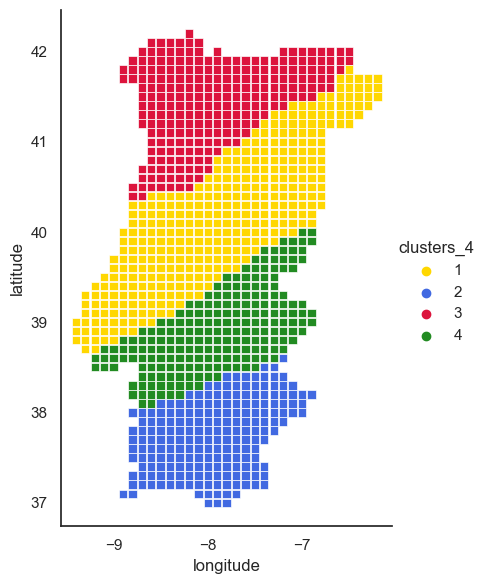

In [6]:
# Concatenating dataframes
transp_1day = transp_1day.reset_index(drop = True)
result_1day = pd.concat([local, transp_1day], axis = 1)

# Visualization with 4 clusters
palette_ = ["gold", "royalblue", "crimson", "forestgreen"]
sns.set_theme(style='white')
sns.relplot(data = result_1day, x = "longitude", y = "latitude", hue = "clusters_4", palette = palette_, marker="s", height=6, aspect=0.7)
plt.savefig(r"C:\Users\joaoa\Desktop\Doutoramento\Precipitacao_diaria_ERA\Maps\1_day_4_clusters.png")
plt.show()

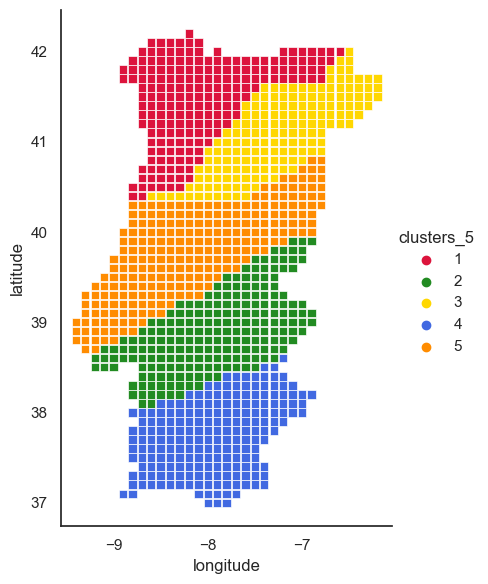

In [7]:
# Visualization with 5 clusters
palette_ = ["crimson", "forestgreen", "gold", "royalblue", "darkorange"]
sns.set_theme(style='white')
sns.relplot(data = result_1day, x = "longitude", y = "latitude", hue = "clusters_5", palette = palette_, marker="s", height=6, aspect=0.7)
plt.savefig(r"C:\Users\joaoa\Desktop\Doutoramento\Precipitacao_diaria_ERA\Maps\1_day_5_clusters.png")
plt.show()

# 2_days

In [8]:
# Clustering (k-means)
K = range(4, 6)
inertia = []

for n in K:
    X = df_2days.transpose()
    kmeans = KMeans(n_clusters = n, random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    kmeans.labels_ += 1
    transp_2days["clusters_" + str(n)] = kmeans.labels_
transp_2days

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,clusters_4,clusters_5
P0000,1.154295,-1.160579,0.093082,0.173360,-0.534298,-0.149952,2.043954,-0.622274,1.601324,-0.863109,...,0.543960,1.056421,0.411996,-0.760837,-0.017438,-0.889502,-2.449980,0.272883,3,1
P0001,-0.320933,-0.477863,-0.592107,-0.018373,-0.161911,-0.792559,2.155623,-1.245771,0.639475,-1.206852,...,0.590932,-0.090352,0.269959,-0.879184,-0.659064,-0.609683,-1.985223,0.198817,3,1
P0002,-0.484521,-0.679189,-0.572186,0.026858,-0.144175,-0.716576,2.206881,-1.087863,0.815414,-1.241707,...,0.710989,0.273953,0.387402,-0.838619,-0.467332,-0.641803,-2.075814,0.203048,3,1
P0003,0.174004,-0.891544,-0.541383,0.033849,-0.141004,-0.620820,2.199186,-0.997003,1.065157,-1.025765,...,0.860630,0.603146,0.431033,-0.842695,-0.254680,-0.743627,-2.226904,0.223766,3,1
P0004,0.878153,-1.069724,-0.111215,0.043552,-0.167709,-0.485788,2.069287,-0.886947,1.290706,-0.762564,...,1.076596,0.877203,0.408156,-0.836149,-0.044276,-0.850392,-2.387140,0.133754,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P1058,-0.373304,-0.656313,2.654244,-0.648452,-0.995739,-0.863483,0.508555,1.801980,2.276899,-0.562440,...,0.170979,-0.042665,-0.396889,-1.089613,-1.158053,0.274564,-0.379779,-0.367293,4,5
P1059,-0.275007,-0.675083,2.777220,-0.804345,-0.939980,-0.873983,0.324423,1.823228,2.172327,-0.571764,...,-0.049254,0.154653,-0.440681,-0.978667,-1.002335,0.115965,-0.439316,-0.292303,4,5
P1062,0.072410,-0.604370,2.529303,-0.383158,-1.291121,-0.778891,0.945015,1.168039,2.393766,-0.652419,...,0.604585,-0.268926,-0.405823,-1.377248,-1.235818,0.259623,-0.782517,-0.452060,4,5
P1063,0.164883,-0.597036,2.724184,-0.482338,-1.259732,-0.791384,0.876280,1.259971,2.264939,-0.656660,...,0.436607,-0.161459,-0.382206,-1.322088,-1.301606,0.240438,-0.778185,-0.419983,4,5


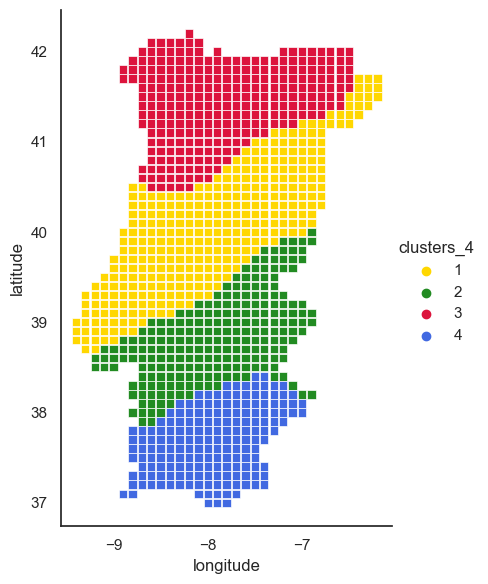

In [9]:
# Concatenating dataframes
transp_2days = transp_2days.reset_index(drop = True)
result_2days = pd.concat([local, transp_2days], axis = 1)

# Visualization with 4 clusters
palette_ = ["gold", "forestgreen", "crimson", "royalblue"]
sns.set_theme(style='white')
sns.relplot(data = result_2days, x = "longitude", y = "latitude", hue = "clusters_4", palette = palette_, marker="s", height=6, aspect=0.7)
plt.savefig(r"C:\Users\joaoa\Desktop\Doutoramento\Precipitacao_diaria_ERA\Maps\2_days_4_clusters.png")
plt.show()

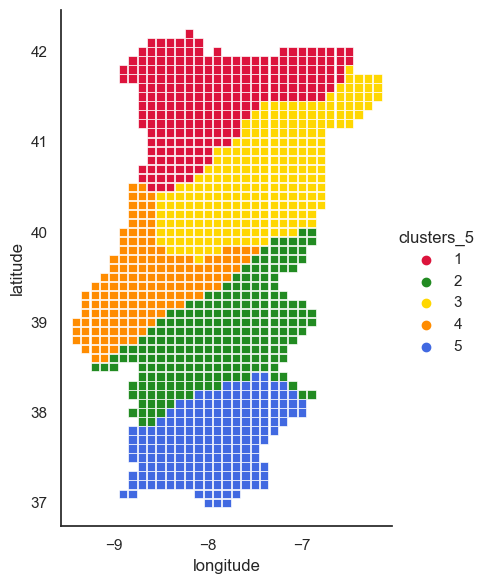

In [10]:
# Visualization with 5 clusters
palette_ = ["crimson", "forestgreen", "gold", "darkorange", "royalblue"]
sns.set_theme(style='white')
sns.relplot(data = result_2days, x = "longitude", y = "latitude", hue = "clusters_5", palette = palette_, marker="s", height=6, aspect=0.7)
plt.savefig(r"C:\Users\joaoa\Desktop\Doutoramento\Precipitacao_diaria_ERA\Maps\2_days_5_clusters.png")
plt.show()

# 4_days

In [11]:
# Clustering (k-means)
K = range(4, 6)
inertia = []

for n in K:
    X = df_4days.transpose()
    kmeans = KMeans(n_clusters = n, random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    kmeans.labels_ += 1
    transp_4days["clusters_" + str(n)] = kmeans.labels_
transp_4days

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,clusters_4,clusters_5
P0000,-0.039352,-0.938884,1.272081,0.404319,-0.261002,-0.036396,1.102519,-0.494105,1.633741,-0.461966,...,0.803290,0.984674,-0.848746,-0.931126,0.627447,-0.379586,-2.066716,-0.044524,3,1
P0001,-0.003448,-0.693124,0.296194,-0.354072,0.270546,-0.454474,1.084708,-1.214838,0.928631,-0.556753,...,0.591769,0.022513,-0.843883,-0.560193,-0.626502,-0.286200,-1.894505,-0.132000,3,1
P0002,-0.142566,-0.870613,0.430809,-0.290363,0.198647,-0.453783,1.111986,-1.082152,1.168542,-0.434410,...,0.713904,0.290824,-0.919045,-0.727816,-0.320985,-0.332233,-1.905189,-0.019767,3,1
P0003,-0.164914,-0.973877,0.594495,-0.156226,0.030409,-0.398529,1.084571,-0.981600,1.509968,-0.284617,...,0.810733,0.522415,-0.897293,-0.901798,0.015285,-0.446796,-1.930217,0.192587,3,1
P0004,0.065255,-0.873603,0.758118,-0.019306,-0.175726,-0.310088,1.027174,-0.871597,1.823983,-0.161354,...,0.839336,0.736727,-0.886972,-0.972201,0.354700,-0.511630,-2.032719,0.214322,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P1058,-0.431022,-0.825507,1.467380,-0.570013,-1.281835,-0.374488,0.354201,1.839377,3.413570,-0.665901,...,-0.119931,-0.280161,0.283300,-1.274027,-0.988548,-0.237683,-0.623111,-0.102128,2,4
P1059,-0.406388,-0.860548,1.541376,-0.716463,-1.255469,-0.373993,0.159151,1.852377,3.300010,-0.701345,...,0.061347,-0.204917,0.155449,-1.192837,-0.943852,-0.170053,-0.667098,-0.030288,2,4
P1062,0.011940,-0.663292,1.444485,-0.349641,-1.422702,-0.417045,0.773747,1.304586,3.587312,-0.623449,...,0.037703,-0.196861,0.305819,-1.484713,-0.978140,-0.385590,-0.926314,-0.134849,2,4
P1063,0.043179,-0.669462,1.555406,-0.433214,-1.440865,-0.392140,0.617610,1.377620,3.507749,-0.572924,...,-0.074045,-0.182276,0.280627,-1.437568,-1.005246,-0.387943,-0.929694,-0.095931,2,4


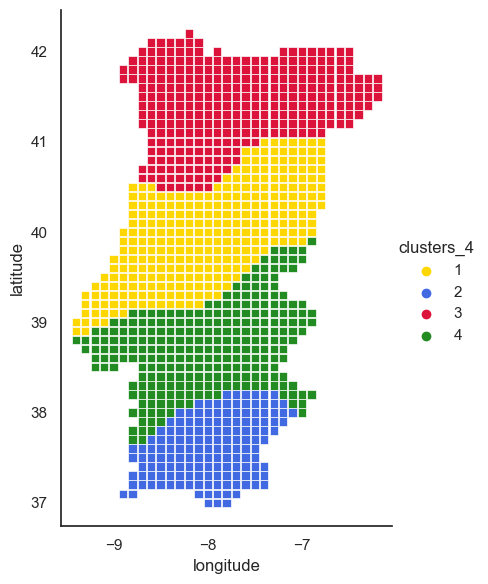

In [12]:
# Concatenating dataframes
transp_4days = transp_4days.reset_index(drop = True)
result_4days = pd.concat([local, transp_4days], axis = 1)

# Visualization with 4 clusters
palette_ = ["gold", "royalblue", "crimson", "forestgreen"]
sns.set_theme(style='white')
sns.relplot(data = result_4days, x = "longitude", y = "latitude", hue = "clusters_4", palette = palette_, marker="s", height=6, aspect=0.7)
plt.savefig(r"C:\Users\joaoa\Desktop\Doutoramento\Precipitacao_diaria_ERA\Maps\4_days_4_clusters.png")
plt.show()

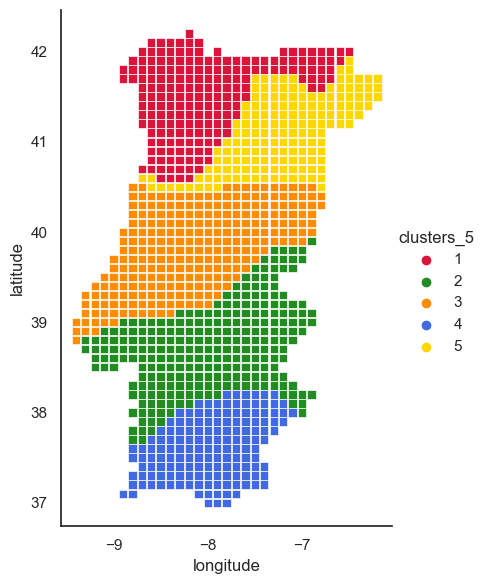

In [14]:
# Visualization with 5 clusters
palette_ = ["crimson", "forestgreen", "darkorange", "royalblue", "gold"]
sns.set_theme(style='white')
sns.relplot(data = result_4days, x = "longitude", y = "latitude", hue = "clusters_5", palette = palette_, marker="s", height=6, aspect=0.7)
plt.savefig(r"C:\Users\joaoa\Desktop\Doutoramento\Precipitacao_diaria_ERA\Maps\4_days_5_clusters.png")
plt.show()